In [1]:
#https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

'''
Exploring and Processing the Data
Building and Training our Neural Network
Visualizing Loss and Accuracy
Adding Regularization to our Neural Network
'''

'\nExploring and Processing the Data\nBuilding and Training our Neural Network\nVisualizing Loss and Accuracy\nAdding Regularization to our Neural Network\n'

In [42]:
import pandas as pd

df = pd.read_csv('Combined_Izmir_full.csv')

#https://www.youtube.com/watch?v=2IpFKLohxOI
# shuffle the generated data
#ds = df.sample(frac=1)
df.head(5)

,Floor_Area,Floor_Number,ofPeople_service,ofPeople_living,ofPeople_bedroom,Construction_recorded,schedule_recorded,Window_Count,w_north,w_north-east,...,o_east,o_south-east,o_south,o_south-west,o_west,o_north-west,Cooling,Heating,Lighting,Equipment
0,50.33,5,0.114,0.114,0.057,0,0,4,0,0,...,0,0,0,0,1,1,53.25,37.55,7.56,2.38
1,61.50,3,0.102,0.102,0.051,1,2,3,0,1,...,0,0,0,0,1,1,21.82,23.23,7.02,2.38
2,77.37,2,0.048,0.048,0.024,0,0,4,0,1,...,1,0,0,0,0,0,31.13,30.83,11.55,2.38
3,150.28,4,0.051,0.051,0.026,0,2,5,0,1,...,1,1,1,0,0,1,56.48,62.20,6.83,2.38
4,105.60,1,0.048,0.048,0.024,0,2,3,0,0,...,1,1,0,0,1,1,50.08,23.49,7.05,2.38


In [43]:
# drop other prediction columns
df= df.drop(['Heating','Lighting','Equipment'], axis = 1)

dataset = df.values
dataset

array([[5.0330e+01, 5.0000e+00, 1.1400e-01, ..., 1.0000e+00, 1.0000e+00,
        5.3250e+01],
       [6.1500e+01, 3.0000e+00, 1.0200e-01, ..., 1.0000e+00, 1.0000e+00,
        2.1820e+01],
       [7.7370e+01, 2.0000e+00, 4.8000e-02, ..., 0.0000e+00, 0.0000e+00,
        3.1130e+01],
       ...,
       [4.8400e+01, 3.0000e+00, 4.6000e-02, ..., 0.0000e+00, 1.0000e+00,
        2.9170e+01],
       [1.3793e+02, 1.0000e+00, 1.3400e-01, ..., 1.0000e+00, 1.0000e+00,
        1.1100e+01],
       [1.1235e+02, 3.0000e+00, 6.1000e-02, ..., 0.0000e+00, 0.0000e+00,
        2.2350e+01]])

In [44]:
X = dataset[:, 0:25]
Y = dataset[:,25]

In [45]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() 
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.06560236, 0.8       , 0.21444201, ..., 0.        , 1.        ,
        1.        ],
       [0.14052858, 0.4       , 0.18818381, ..., 0.        , 1.        ,
        1.        ],
       [0.24698149, 0.2       , 0.07002188, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05265629, 0.4       , 0.06564551, ..., 0.        , 0.        ,
        1.        ],
       [0.65320633, 0.        , 0.25820569, ..., 0.        , 1.        ,
        1.        ],
       [0.48162061, 0.4       , 0.09846827, ..., 0.        , 0.        ,
        0.        ]])

In [46]:
from sklearn.model_selection import train_test_split
#splitting of train and test set
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.1)
#splitting of test and validaiton set
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1820, 25) (101, 25) (102, 25) (1820,) (101,) (102,)


In [47]:
#Setting up the architecture
'''
Hidden layer 1: 32 neurons, ReLU activation
Hidden layer 2: 32 neurons, ReLU activation
Output Layer: 1 neuron, Sigmoid activation
'''
from keras.models import Sequential
from keras.layers import Dense
'''
# binary classification
model = Sequential([    
    Dense(32, activation='relu', input_shape=(25,)),    
    Dense(32, activation='relu'),    
    Dense(1, activation='sigmoid'),])
'''
# regression
model = Sequential([    
    Dense(32, activation='relu', input_shape=(25,)),    
    Dense(32, activation='relu'),    
    Dense(1, activation='linear'),])

In [48]:
model.compile(optimizer='sgd',              
              loss='binary_crossentropy',              
              metrics=['accuracy'])

#https://keras.io/losses/
#model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [52]:
hist = model.fit(X_train, Y_train,          
                 batch_size=32, epochs=100,          
                 validation_data=(X_val, Y_val))

Train on 1820 samples, validate on 101 samples
Epoch 1/100
1820/1820 [==============================] - 0s 44us/step - loss: -478.1282 - accuracy: 5.4945e-04 - val_loss: -444.6852 - val_accuracy: 0.0000e+00
Epoch 2/100
1820/1820 [==============================] - 0s 41us/step - loss: -478.1282 - accuracy: 5.4945e-04 - val_loss: -444.6852 - val_accuracy: 0.0000e+00
Epoch 3/100
1820/1820 [==============================] - 0s 41us/step - loss: -478.1282 - accuracy: 5.4945e-04 - val_loss: -444.6852 - val_accuracy: 0.0000e+00
Epoch 4/100
1820/1820 [==============================] - 0s 38us/step - loss: -478.1282 - accuracy: 5.4945e-04 - val_loss: -444.6852 - val_accuracy: 0.0000e+00
Epoch 5/100
1820/1820 [==============================] - 0s 38us/step - loss: -478.1282 - accuracy: 5.4945e-04 - val_loss: -444.6852 - val_accuracy: 0.0000e+00
Epoch 6/100
1820/1820 [==============================] - 0s 39us/step - loss: -478.1282 - accuracy: 5.4945e-04 - val_loss: -444.6852 - val_accuracy: 0.00

In [50]:
# have the index 1 after the model.evaluate function is because the function returns 
# the loss as the first element and the accuracy as the second element. 
model.evaluate(X_test, Y_test)[1]

102/102 [==============================] - 0s 39us/step


0.0

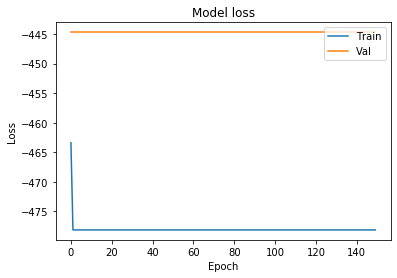

In [51]:
# Visualizing Loss and Accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

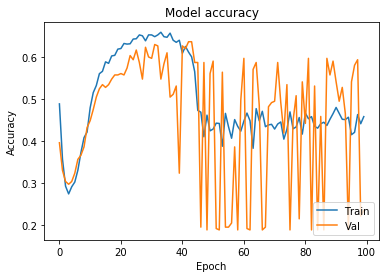

In [12]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [13]:
#Adding Regularization
'''
Adam is one of the most common optimizers we use, which adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster.
'''
model_2 = Sequential([    
    Dense(1000, activation='relu', input_shape=(10,)),    
    Dense(1000, activation='relu'),    
    Dense(1000, activation='relu'),    
    Dense(1000, activation='relu'),    
    Dense(1, activation='sigmoid'),])

model_2.compile(optimizer='adam',              
                loss='binary_crossentropy',              
                metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,          
                     batch_size=32, epochs=100,          
                     validation_data=(X_val, Y_val))

Train on 1416 samples, validate on 303 samples
Epoch 1/100
1416/1416 [==============================] - 2s 1ms/step - loss: -33.9643 - accuracy: 0.6073 - val_loss: -309.5599 - val_accuracy: 0.5314
Epoch 2/100
1416/1416 [==============================] - 2s 1ms/step - loss: -6866.2255 - accuracy: 0.6250 - val_loss: -26887.9974 - val_accuracy: 0.6469
Epoch 3/100
1416/1416 [==============================] - 2s 1ms/step - loss: -172664.9129 - accuracy: 0.6405 - val_loss: -475935.2857 - val_accuracy: 0.6040
Epoch 4/100
1416/1416 [==============================] - 2s 1ms/step - loss: -1560756.2476 - accuracy: 0.6328 - val_loss: -3383324.7166 - val_accuracy: 0.6271
Epoch 5/100
1416/1416 [==============================] - 2s 1ms/step - loss: -7872059.0125 - accuracy: 0.6603 - val_loss: -13598717.5479 - val_accuracy: 0.5974
Epoch 6/100
1416/1416 [==============================] - 2s 1ms/step - loss: -26817225.8489 - accuracy: 0.6412 - val_loss: -40080370.4818 - val_accuracy: 0.6172
Epoch 7/100


Epoch 50/100
1416/1416 [==============================] - 2s 1ms/step - loss: -2533011972790.2373 - accuracy: 0.6504 - val_loss: -2345535659356.0923 - val_accuracy: 0.6007
Epoch 51/100
1416/1416 [==============================] - 2s 1ms/step - loss: -2758028977817.3105 - accuracy: 0.6617 - val_loss: -2573428365548.5679 - val_accuracy: 0.5908
Epoch 52/100
1416/1416 [==============================] - 2s 1ms/step - loss: -3012292075288.5874 - accuracy: 0.6419 - val_loss: -2798825302320.1582 - val_accuracy: 0.5743
Epoch 53/100
1416/1416 [==============================] - 2s 1ms/step - loss: -3268454640067.2544 - accuracy: 0.6603 - val_loss: -3034498365433.2407 - val_accuracy: 0.5578
Epoch 54/100
1416/1416 [==============================] - 2s 1ms/step - loss: -3538891209733.7852 - accuracy: 0.6497 - val_loss: -3280532050257.9536 - val_accuracy: 0.6040
Epoch 55/100
1416/1416 [==============================] - 2s 1ms/step - loss: -3826798252448.5420 - accuracy: 0.6504 - val_loss: -3528282149

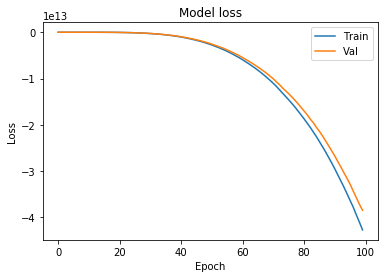

In [14]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# this is over-fitting

In [39]:
#deal with over-fitting problem
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    
    Dropout(0.3),    
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

model_3.compile(optimizer='adam',              
                loss='binary_crossentropy',              
                metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,          
                     batch_size=32, epochs=100,          
                     validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.2377 - accuracy: 0.6194 - val_loss: 3.8743 - val_accuracy: 0.7945
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.6784 - accuracy: 0.8386 - val_loss: 0.6495 - val_accuracy: 0.8630
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5859 - accuracy: 0.8611 - val_loss: 0.4810 - val_accuracy: 0.8767
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5027 - accuracy: 0.8581 - val_loss: 0.4474 - val_accuracy: 0.8995
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5040 - accuracy: 0.8640 - val_loss: 0.4841 - val_accuracy: 0.8630
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4867 - accuracy: 0.8767 - val_loss: 0.5133 - val_accuracy: 0.8311
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.498

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4353 - accuracy: 0.8914 - val_loss: 0.4100 - val_accuracy: 0.8813
Epoch 58/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4248 - accuracy: 0.8885 - val_loss: 0.4527 - val_accuracy: 0.8767
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4349 - accuracy: 0.8933 - val_loss: 0.4046 - val_accuracy: 0.9041
Epoch 60/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4330 - accuracy: 0.8875 - val_loss: 0.4259 - val_accuracy: 0.8813
Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4208 - accuracy: 0.8943 - val_loss: 0.4202 - val_accuracy: 0.8767
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4448 - accuracy: 0.8777 - val_loss: 0.4094 - val_accuracy: 0.8995
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4392 - accuracy: 0.8777 - val_loss: 0.4943 -

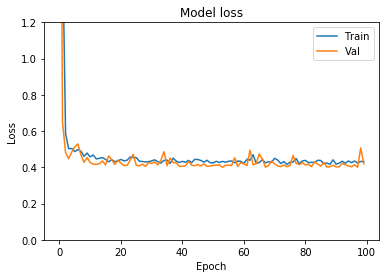

In [42]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

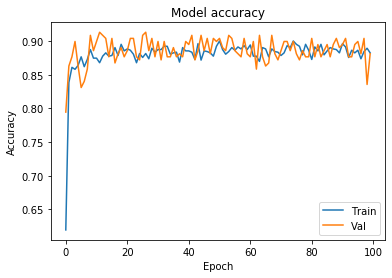

In [43]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


In [ ]:
# SUMMARY
'''
Explore and Process the Data
Build and Train our Neural Network
Visualize Loss and Accuracy
Add Regularization to our Neural Network
'''